Dataset in this [link](https://www.kaggle.com/c/titanic)

## Description

Data Dictionary

Variable |Definition |Key
-|-|-
survival	|Survival	|0 = No, 1 = Yes
pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
sex|	Sex|	
Age	|Age in years	
sibsp	|# of siblings / spouses aboard the Titanic	|
parch	|# of parents / children aboard the Titanic|	
ticket	|Ticket number	|
fare	|Passenger fare	|
cabin	|Cabin number	|
embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

___
Variable Notes
___

pclass: A proxy for socio-economic status (SES)

1st| Upper
-|-
2nd |Middle
3rd | Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [30]:
# Change plot size

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,10)

In [1]:
path = 'dataset/Titanic/train.csv'

In [2]:
import pandas as pd

data = pd.read_csv(path)

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verify missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There is a large numer of null values in column Age

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All feature are normal, without outliners

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_coor(data):
    sns.heatmap(data.corr(),annot=True, cmap='summer')
    plt.show()

Create a new feature 'family'

In [8]:
data['Family'] = data['Parch'] + data['SibSp'] +1 # 1 more for include the passager

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
# get all prefix

import re

mapa_name = {'Lady.':0, 'Miss.':1, 'Don.':2,
             'Rev.':3, 'Major.':4, 'L.':17,'Mlle.':5,
             
             'Capt.':6, 'Jonkheer.':7, 'Countess.':8,
             'Sir.':9, 'Mr.':10, 'Col.':11, 'Dr.':12,
             'Master.':13, 'Ms.':14, 'Mrs.':15, 'Mme.':16}

for i in range(len(data['Name'])):
    data['Name'][i] = mapa_name[ re.findall( '\w+\.', data['Name'][i])[0] ]



Futrelle, Mrs. Jacques Heath (Lily May Peel)

/home/felipe/ambientes/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
set(data['Embarked'])

{'C', 'Q', 'S', nan}

'Embarked' column has 2 examples with null value therefore, I change this values for shipped in 'Cherbourg'.

In [12]:
for i in range(len(data['Embarked'])):
    if(pd.isnull(data['Embarked'][i])):
        data['Embarked'][i] = 'C'

mapa = {'C':1, 'Q':2, 'S':3}
        
for i in range(len(data['Embarked'])):
    data['Embarked'][i] = mapa[data['Embarked'][i]]

/home/felipe/ambientes/ml/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/felipe/ambientes/ml/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
set(data['Embarked'])

{1, 2, 3}

Change 'Sex' columns for numerical data

In [14]:
set(data['Sex'])

{'female', 'male'}

In [15]:
for i in range(len(data['Sex'])):
    if(data['Sex'][i] == 'male'):
        data['Sex'][i] = 0
    else:
        data['Sex'][i] = 1

/home/felipe/ambientes/ml/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/felipe/ambientes/ml/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
set(data['Sex'])

{0, 1}

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


'Cabin' column has a lot data missing, let's delete it

In [18]:
del data['Cabin']

In the 'Age' columns let's enter the mean age as given in dataset

In [19]:
data['Age'] = data['Age'].fillna( data.describe()['Age']['mean'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [21]:
data['Child'] = data['Age']<18

In [32]:
# change type of columns: Sex

data['Sex'] = pd.to_numeric(data['Sex'])
data['Embarked'] = pd.to_numeric(data['Embarked'])
data['Name'] = pd.to_numeric(data['Name'])


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
Family         891 non-null int64
Child          891 non-null bool
dtypes: bool(1), float64(2), int64(9), object(1)
memory usage: 84.5+ KB


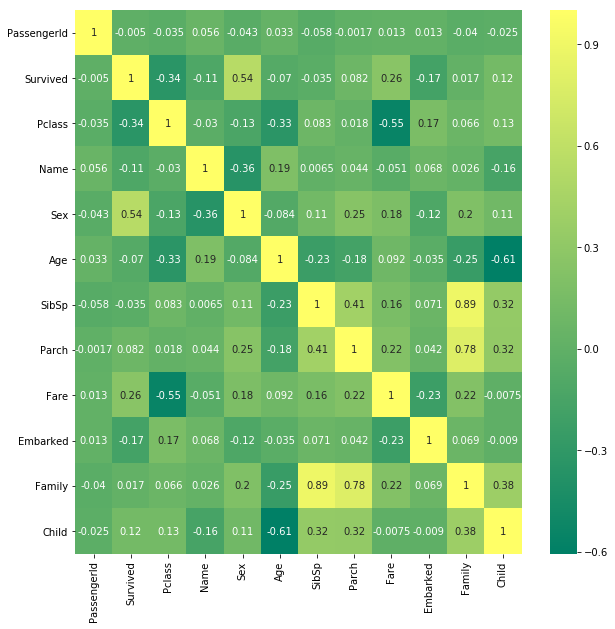

In [34]:
plot_coor(data)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Child
0,1,0,3,10,0,22.0,1,0,A/5 21171,7.2500,3,2,False
1,2,1,1,15,1,38.0,1,0,PC 17599,71.2833,1,2,False
2,3,1,3,1,1,26.0,0,0,STON/O2. 3101282,7.9250,3,1,False
3,4,1,1,15,1,35.0,1,0,113803,53.1000,3,2,False
4,5,0,3,10,0,35.0,0,0,373450,8.0500,3,1,False



the correlation matrix does not show anything yet, we will derive some new features

## Visualize numerical data

In [26]:
# removing no numerical data

from sklearn.manifold import TSNE

data_copy = data.copy()
del data_copy['Embarked']
del data_copy['Name']
del data_copy['Ticket']

Y = data_copy['Survived']
del data_copy['Survived']

X = data_copy 

reduction = TSNE(n_components=2).fit_transform(X)

In [27]:
reduction.shape

(891, 2)

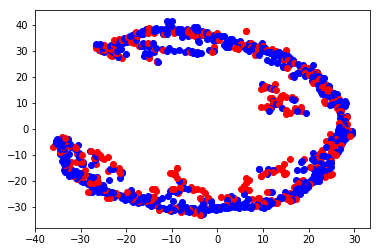

In [28]:

for i in range(len(reduction)):
    if(Y[i]==1):
        plt.scatter(reduction[i][0], reduction[i][1], c='red')
    else:
        plt.scatter(reduction[i][0], reduction[i][1], c='blue')

plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_copy, Y, test_size=0.2)

tree.fit(x_train,y_train)
print(tree.score(x_test,y_test))

0.843575418994


In [64]:
from sklearn.mixture import GaussianMixture

gauss = GaussiabnMixture(n_components=2)

gauss.fit(x_train, y_train)

print(x_test, y_test)


NameError: name 'GaussinaMixture' is not defined